In [21]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import glob
import numpy as np
import pandas as pd
import functools
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

%matplotlib inline
ia.seed(1)

In [65]:
def bb_midpoint_to_corner(bb):
    label = bb[0]
    x1 = bb[1] - bb[3]/2
    x2 = bb[1] + bb[3]/2
    y1 = bb[2] - bb[4]/2
    y2 = bb[2] + bb[4]/2
    corner_list = [label, x1, x2, y1, y2]
    return np.array(corner_list)

def bb_corner_to_midpoint(bb):
    label = bb[0]
    x = bb[1] + (bb[2] - bb[1])/2
    y = bb[3] + (bb[4] - bb[3])/2
    w = bb[2] - bb[1]
    h = bb[4] - bb[3]
    midpoint_list = [label, x, y, w, h]
    return np.array(midpoint_list)

def bbs_to_bb(bbs_list, width, height):
    corner_list = []
    for bbs in bbs_list:
        label = bbs.label
        x1 = bbs.x1/width
        x2 = bbs.x2/width
        y1 = bbs.y1/height
        y2 = bbs.y2/height
        corner_list.append([label, x1, x2, y1, y2])

    midpoint_list = np.apply_along_axis(bb_corner_to_midpoint, axis=1, arr=corner_list)
    return np.array(midpoint_list)

def save_bb_txt(bbs_df, name):
    bbs_df.to_csv(name, index = False, header = False, sep = " ", float_format='%.6f')


In [41]:
image_path = "./images_bgr/"
label_path = "./labels_sub/"

image_list = os.path.join(os.path.join(image_path, "*.*"))
label_list = []

# Lista com todos os arquivos csv de auxílio emergencial
image_list = glob.glob(image_list)
for name in image_list:
    label_list.append(label_path + name.split("/")[2].split(".")[0] + ".txt")


In [42]:
midpoint = np.genfromtxt(label_list[0], delimiter=' ')
corner = bb_midpoint_to_corner(midpoint)

test = np.apply_along_axis(bb_midpoint_to_corner, axis=1, arr=midpoint)
print(midpoint)
print(test)
print(corner)

[[0.       0.540625 0.684896 0.304688 0.507292]
 [3.       0.268359 0.930729 0.091406 0.138542]
 [1.       0.1375   0.110937 0.076563 0.207292]
 [3.       0.432031 0.789583 0.079687 0.110417]
 [1.       0.286719 0.599479 0.03125  0.073958]
 [1.       0.173437 0.563021 0.03125  0.073958]
 [1.       0.376563 0.626042 0.029687 0.070833]
 [2.       0.403516 0.795833 0.100781 0.10625 ]]
[[0.        0.388281  0.692969  0.43125   0.938542 ]
 [3.        0.222656  0.314062  0.861458  1.       ]
 [1.        0.0992185 0.1757815 0.007291  0.214583 ]
 [3.        0.3921875 0.4718745 0.7343745 0.8447915]
 [1.        0.271094  0.302344  0.5625    0.636458 ]
 [1.        0.157812  0.189062  0.526042  0.6      ]
 [1.        0.3617195 0.3914065 0.5906255 0.6614585]
 [2.        0.3531255 0.4539065 0.742708  0.848958 ]]
[[ 0.         0.540625   0.684896   0.304688   0.507292 ]
 [ 1.5        0.0523435  0.5359375  0.0515625  0.0833335]
 [ 4.5        0.4843745  1.3255205  0.1312495  0.1937505]
 [ 0.5       -0.

/home/andreas/miniconda3/envs/imagens/lib/python3.9/site-packages/imgaug/imgaug.py:2120: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title("imgaug.imshow(%s)" % (image.shape,))


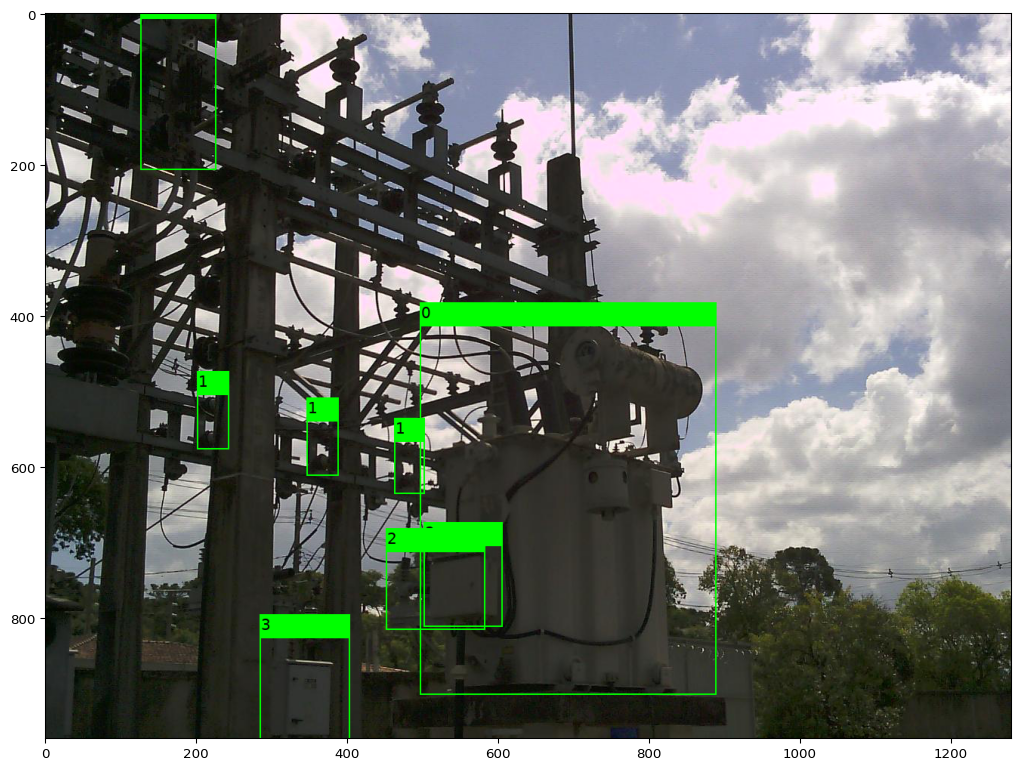

In [43]:
class_colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [128, 0, 128]]
image = imageio.imread(image_list[0])
#image = ia.imresize_single_image(image, (298, 447))
shape = image.shape
width = shape[1]
height = shape[0]
boxes = np.genfromtxt(label_list[0], delimiter=' ')
boxes = np.apply_along_axis(bb_midpoint_to_corner_axis, axis=1, arr=boxes)

bbs = BoundingBoxesOnImage([BoundingBox(x1=list[1]*width, x2=list[2]*width, y1=list[3]*height, y2=list[4]*height, label = int(list[0])) for list in boxes], shape=image.shape)
ia.imshow(bbs.draw_on_image(image, size=2))

In [44]:
print(type(bbs))
for i in bbs:
    print(type(i))

<class 'imgaug.augmentables.bbs.BoundingBoxesOnImage'>
<class 'imgaug.augmentables.bbs.BoundingBox'>
<class 'imgaug.augmentables.bbs.BoundingBox'>
<class 'imgaug.augmentables.bbs.BoundingBox'>
<class 'imgaug.augmentables.bbs.BoundingBox'>
<class 'imgaug.augmentables.bbs.BoundingBox'>
<class 'imgaug.augmentables.bbs.BoundingBox'>
<class 'imgaug.augmentables.bbs.BoundingBox'>
<class 'imgaug.augmentables.bbs.BoundingBox'>


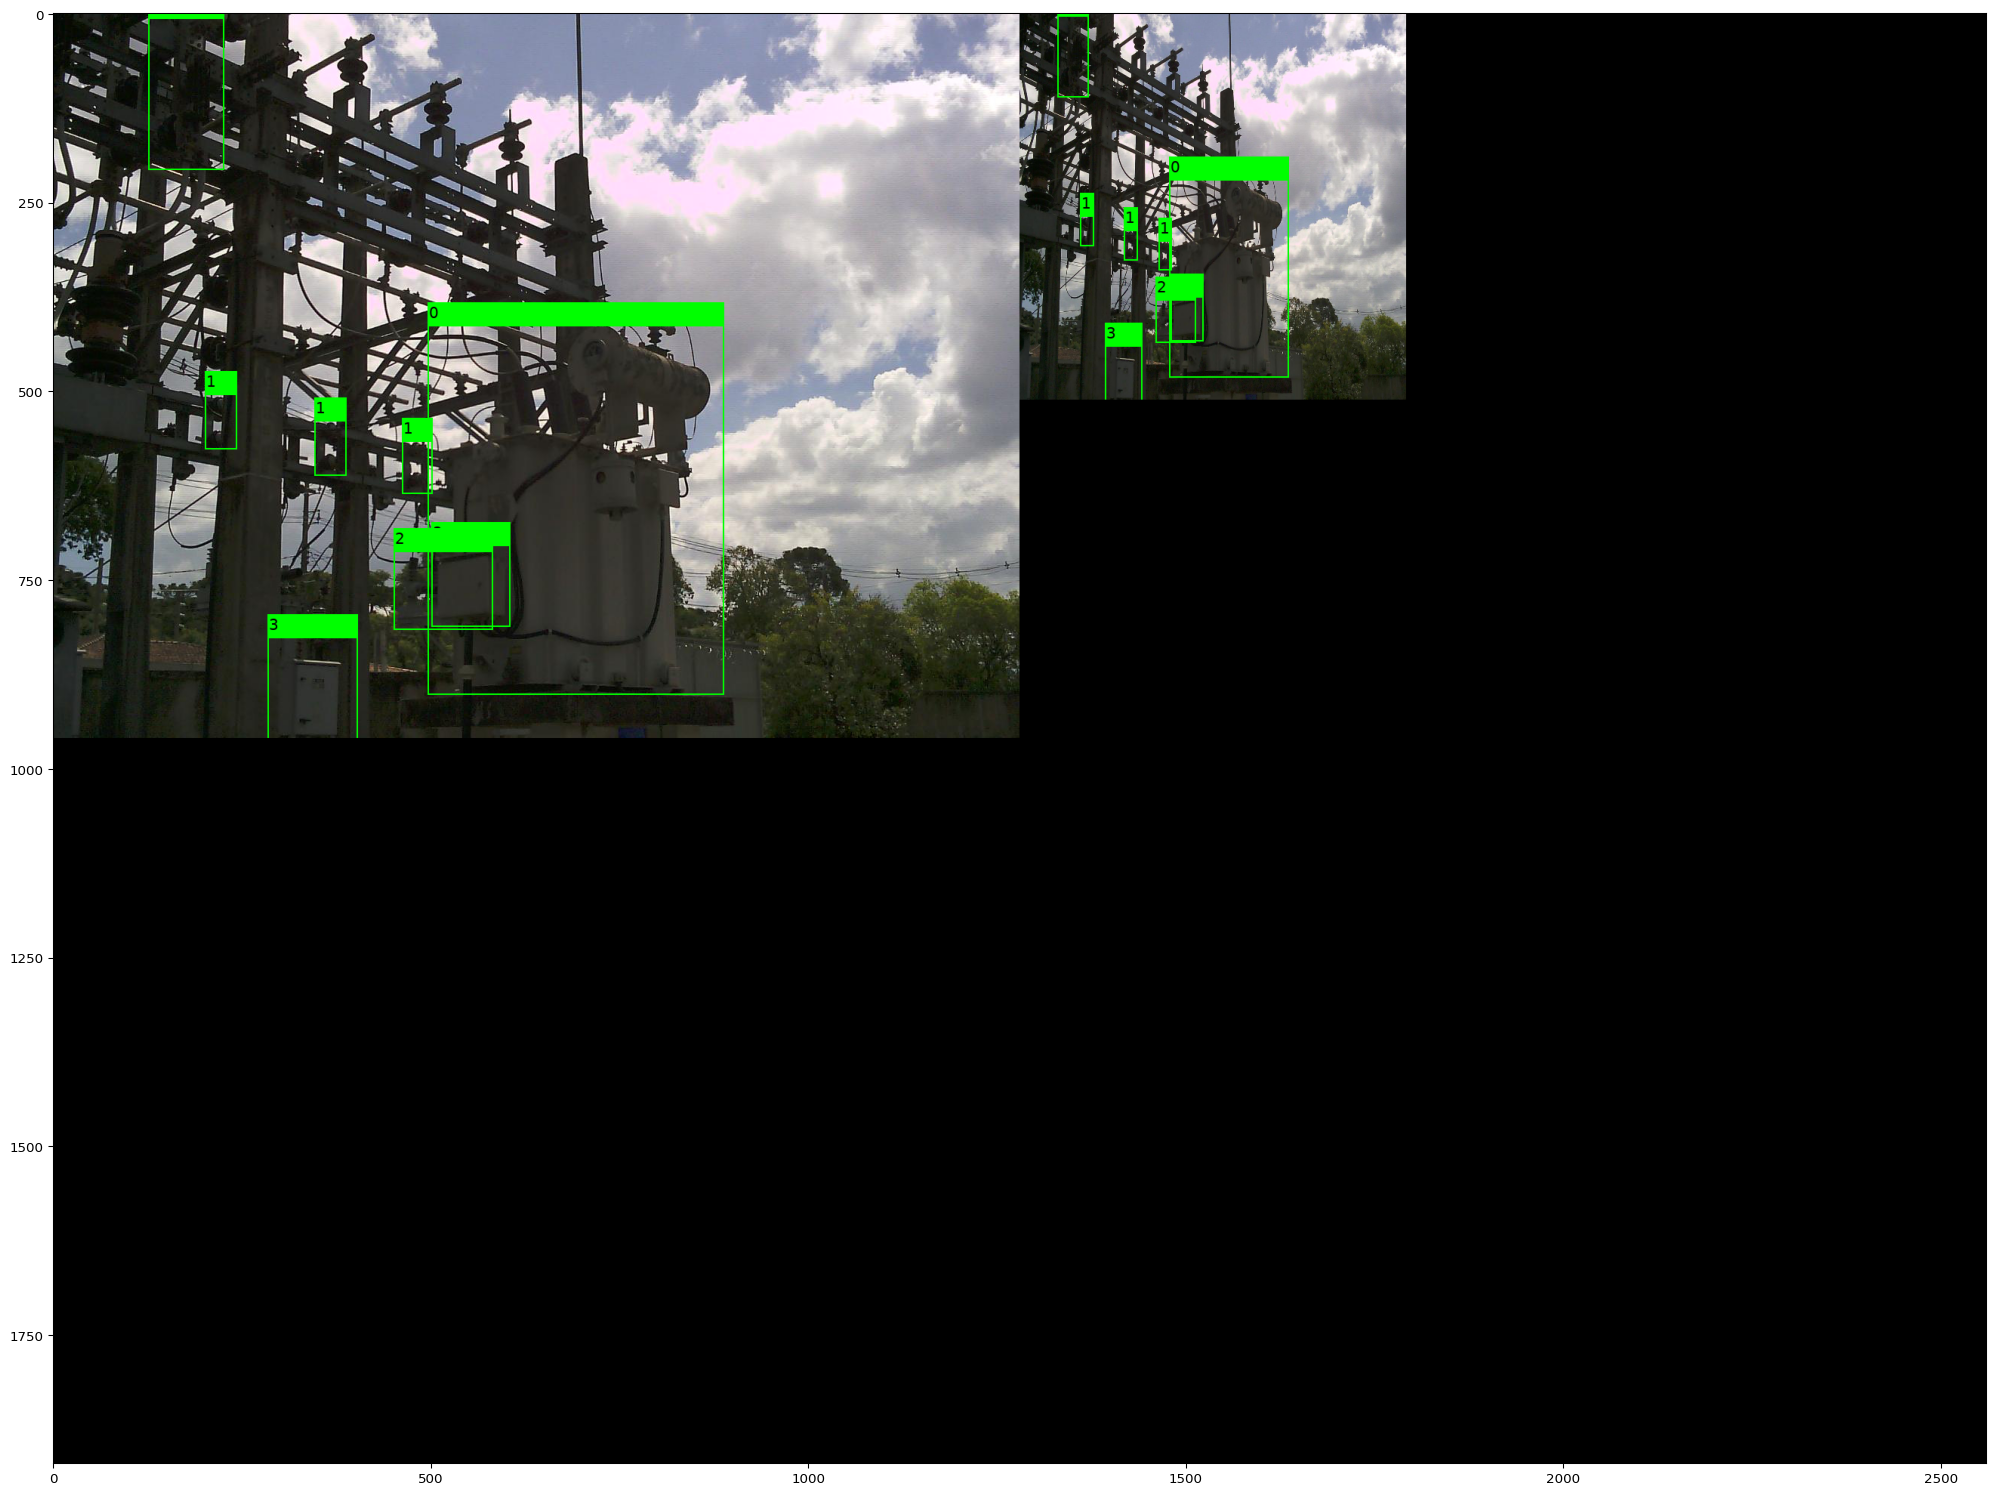

In [45]:
# Rescale image and bounding boxes
image_rescaled = ia.imresize_single_image(image, (512, 512))
bbs_rescaled = bbs.on(image_rescaled)

# Draw image before/after rescaling and with rescaled bounding boxes
image_bbs = bbs.draw_on_image(image, size=2)
image_rescaled_bbs = bbs_rescaled.draw_on_image(image_rescaled, size=2)

ia.ia.show_grid([bbs.draw_on_image(image, size=2), bbs_rescaled.draw_on_image(image_rescaled, size=2)], rows=None, cols=None)

In [48]:
test = bbs_to_bb(bbs, width, height)
print(test)

test.tofile("test.txt", sep=' ')

[[0.       0.540625 0.684896 0.304688 0.507292]
 [3.       0.268359 0.930729 0.091406 0.138542]
 [1.       0.1375   0.110937 0.076563 0.207292]
 [3.       0.432031 0.789583 0.079687 0.110417]
 [1.       0.286719 0.599479 0.03125  0.073958]
 [1.       0.173437 0.563021 0.03125  0.073958]
 [1.       0.376563 0.626042 0.029687 0.070833]
 [2.       0.403516 0.795833 0.100781 0.10625 ]]


In [156]:
df_test = pd.DataFrame(test, columns = ["label", "x", "y", "w", "h"])
df_test["label"] = df_test["label"].astype(int)
df_test

label         x         y         w         h
0      0  0.540625  0.684896  0.304688  0.507292
1      3  0.268359  0.930729  0.091406  0.138542
2      1  0.137500  0.110937  0.076563  0.207292
3      3  0.432031  0.789583  0.079687  0.110417
4      1  0.286719  0.599479  0.031250  0.073958
5      1  0.173437  0.563021  0.031250  0.073958
6      1  0.376563  0.626042  0.029687  0.070833
7      2  0.403516  0.795833  0.100781  0.106250

BB 0: (496.9997, 414.0000, 887.0003, 901.0003) -> (200.7120, 446.9184, 920.5500, 990.3406)
BB 1: (284.9997, 826.9997, 401.9994, 960.0000) -> (-39.9298, 902.9677, 93.1043, 1003.6039)
BB 2: (126.9997, 6.9994, 225.0003, 205.9997) -> (-379.4023, -19.8802, -193.0930, 303.8969)
BB 3: (502.0000, 704.9995, 603.9994, 810.9998) -> (209.0371, 807.2383, 350.0280, 900.6744)
BB 4: (347.0003, 540.0000, 387.0003, 610.9997) -> (9.9298, 653.3168, 64.3596, 723.6949)
BB 5: (201.9994, 505.0003, 241.9994, 576.0000) -> (-169.6288, 626.9109, -113.3862, 696.2285)
BB 6: (463.0010, 567.0005, 501.0003, 635.0002) -> (162.4459, 674.9021, 215.2900, 743.2704)
BB 7: (452.0006, 712.9997, 581.0003, 814.9997) -> (148.1195, 814.1768, 317.3630, 903.2110)


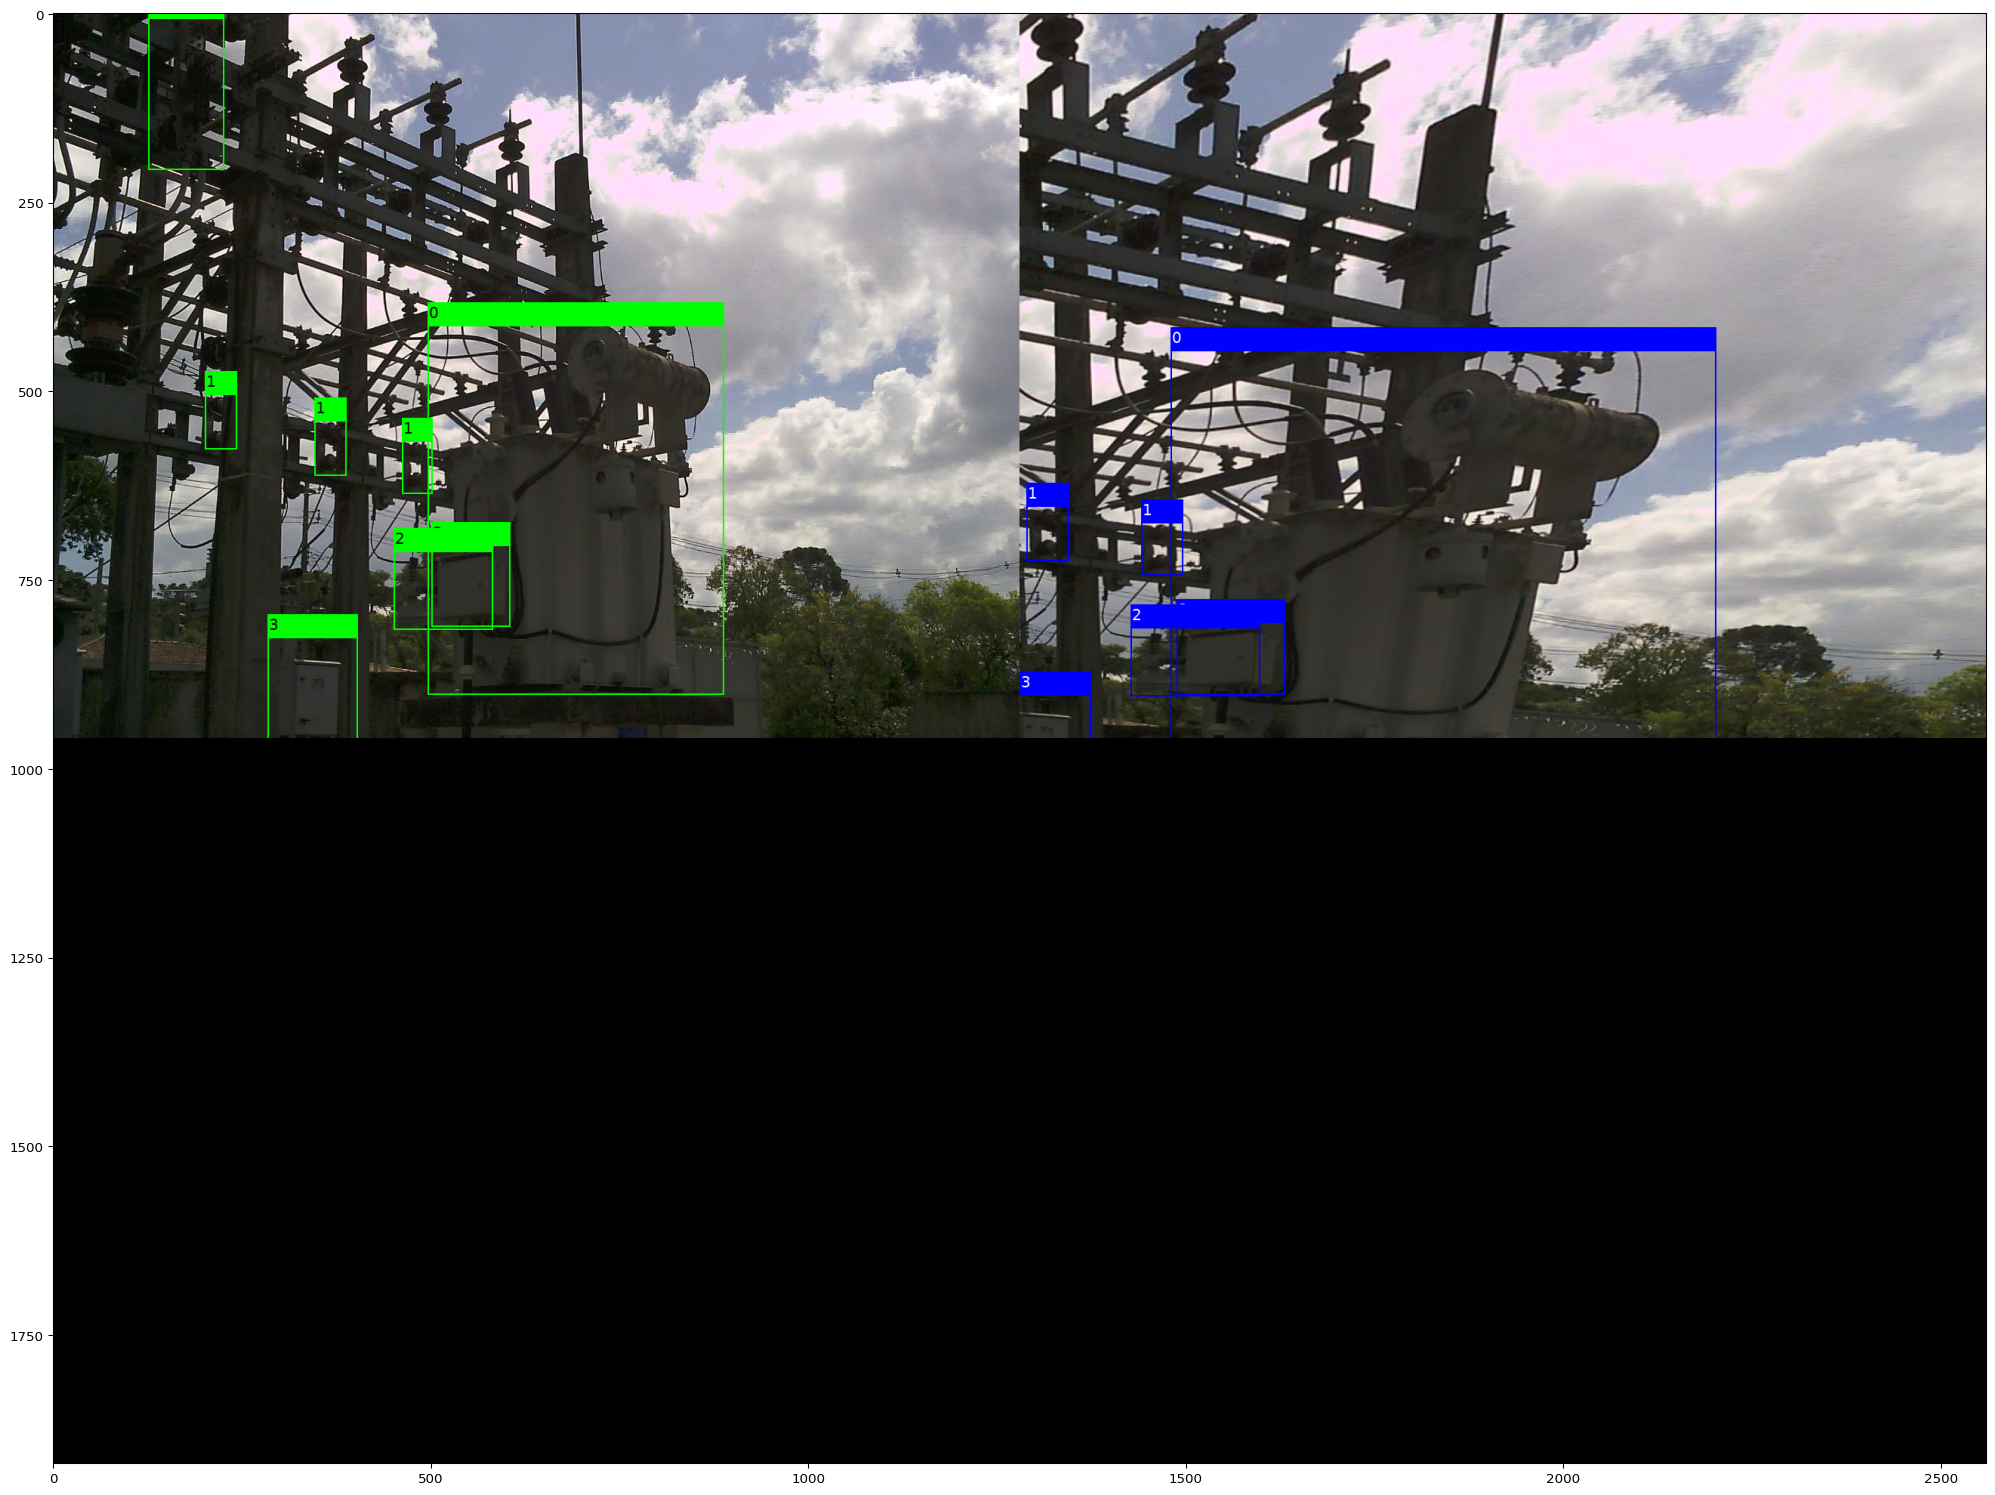

In [170]:
import imgaug.augmenters as iaa

#seq = iaa.Sequential([
    #iaa.Multiply((1.2, 1.5)), # change brightness, doesn't affect BBs
    #iaa.Affine(
    #    translate_px={"x": 40, "y": 60},
    #    scale=(0.5, 0.7),
    #    rotate=45
    #) # translate by 40/60px on x/y axis, and scale to 50-70%, affects BBs
#])
seq = iaa.Sequential([iaa.PerspectiveTransform(scale=(0.01, 0.6))])


# Augment BBs and images.
image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)

# print coordinates before/after augmentation (see below)
# use .x1_int, .y_int, ... to get integer coordinates
for i in range(len(bbs.bounding_boxes)):
    before = bbs.bounding_boxes[i]
    after = bbs_aug.bounding_boxes[i]
    print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f)" % (
        i,
        before.x1, before.y1, before.x2, before.y2,
        after.x1, after.y1, after.x2, after.y2)
    )

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=2)
image_after = bbs_aug.draw_on_image(image_aug, size=2, color=[0, 0, 255])

ia.ia.show_grid([image_before, image_after], rows=None, cols=None)


/home/andreas/miniconda3/envs/imagens/lib/python3.9/site-packages/imgaug/imgaug.py:2120: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title("imgaug.imshow(%s)" % (image.shape,))


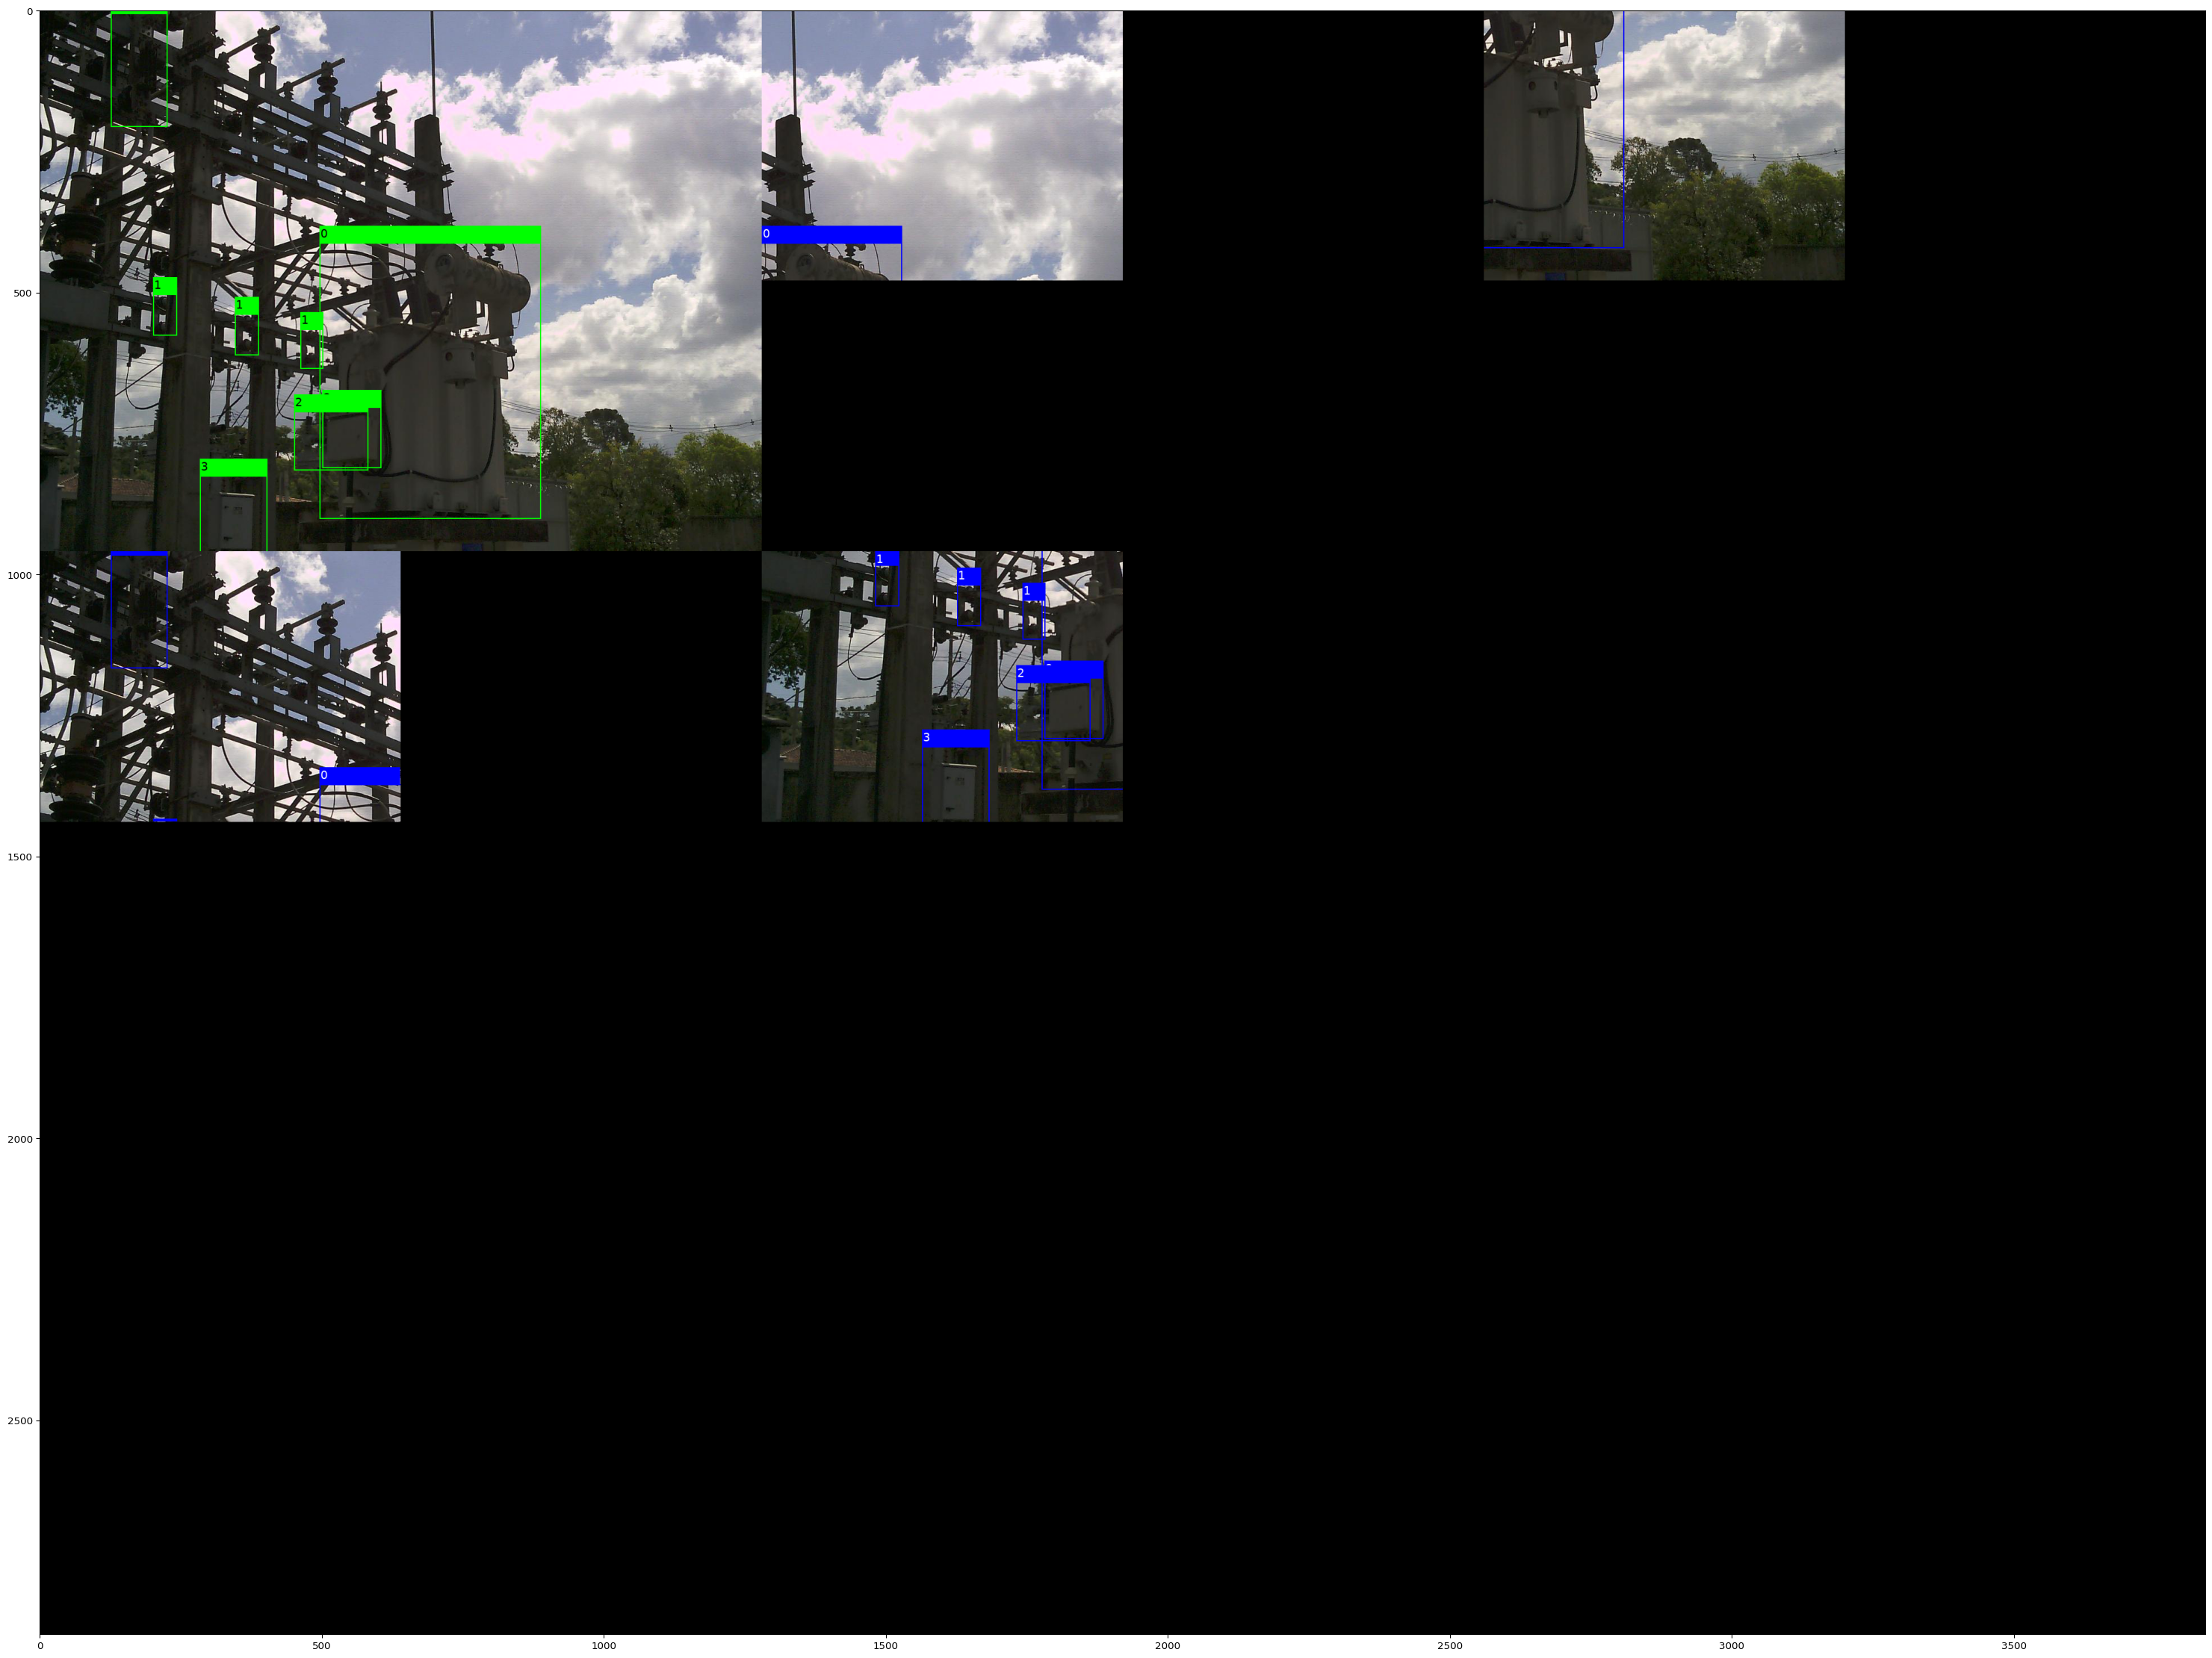

In [64]:
import imgaug.augmenters as iaa

#seq = iaa.Sequential([
    #iaa.Multiply((1.2, 1.5)), # change brightness, doesn't affect BBs
    #iaa.Affine(
    #    translate_px={"x": 40, "y": 60},
    #    scale=(0.5, 0.7),
    #    rotate=45
    #) # translate by 40/60px on x/y axis, and scale to 50-70%, affects BBs
#])
seq1 = iaa.Sequential([iaa.CropToFixedSize(width=int(width/2), height=int(height/2), position="left-bottom")])
seq2 = iaa.Sequential([iaa.CropToFixedSize(width=int(width/2), height=int(height/2), position="left-top")])
seq3 = iaa.Sequential([iaa.CropToFixedSize(width=int(width/2), height=int(height/2), position="right-bottom")])
seq4 = iaa.Sequential([iaa.CropToFixedSize(width=int(width/2), height=int(height/2), position="right-top")])

# Augment BBs and images.
image_aug1, bbs_aug1 = seq1(image=image, bounding_boxes=bbs)
image_aug2, bbs_aug2 = seq2(image=image, bounding_boxes=bbs)
image_aug3, bbs_aug3 = seq3(image=image, bounding_boxes=bbs)
image_aug4, bbs_aug4 = seq4(image=image, bounding_boxes=bbs)

# print coordinates before/after augmentation (see below)
# use .x1_int, .y_int, ... to get integer coordinates
#for i in range(len(bbs.bounding_boxes)):
#    before = bbs.bounding_boxes[i]
#    after = bbs_aug.bounding_boxes[i]
#    print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f)" % (
#        i,
#        before.x1, before.y1, before.x2, before.y2,
#        after.x1, after.y1, after.x2, after.y2)
#    )

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=2)
image_after1 = bbs_aug1.draw_on_image(image_aug1, size=2, color=[0, 0, 255])
image_after2 = bbs_aug2.draw_on_image(image_aug2, size=2, color=[0, 0, 255])
image_after3 = bbs_aug3.draw_on_image(image_aug3, size=2, color=[0, 0, 255])
image_after4 = bbs_aug4.draw_on_image(image_aug4, size=2, color=[0, 0, 255])

ia.ia.show_grid([image_before, image_after1, image_after2, image_after3, image_after4], rows=None, cols=None)


In [70]:
imageio.imwrite("./aug_images/aug1.jpg", image_aug1)
imageio.imwrite("./aug_images/aug2.jpg", image_aug2)
imageio.imwrite("./aug_images/aug3.jpg", image_aug3)
imageio.imwrite("./aug_images/aug4.jpg", image_aug4)

# it's important t use remove_out_of_image() and clip_out_of_range() so only boxes
# actually present in the image are shown
bbs_aug1 = bbs_aug1.remove_out_of_image().clip_out_of_image()
bbs_aug2 = bbs_aug2.remove_out_of_image().clip_out_of_image()
bbs_aug3 = bbs_aug3.remove_out_of_image().clip_out_of_image()
bbs_aug4 = bbs_aug4.remove_out_of_image().clip_out_of_image()

test = bbs_to_bb(bbs_aug1, int(width/2), int(height/2))
df_test = pd.DataFrame(test, columns = ["label", "x", "y", "w", "h"])
df_test["label"] = df_test["label"].astype(int)
save_bb_txt(df_test, "./aug_labels/aug1.txt")

test = bbs_to_bb(bbs_aug2, int(width/2), int(height/2))
df_test = pd.DataFrame(test, columns = ["label", "x", "y", "w", "h"])
df_test["label"] = df_test["label"].astype(int)
save_bb_txt(df_test, "./aug_labels/aug2.txt")

test = bbs_to_bb(bbs_aug3, int(width/2), int(height/2))
df_test = pd.DataFrame(test, columns = ["label", "x", "y", "w", "h"])
df_test["label"] = df_test["label"].astype(int)
save_bb_txt(df_test, "./aug_labels/aug3.txt")

test = bbs_to_bb(bbs_aug4, int(width/2), int(height/2))
df_test = pd.DataFrame(test, columns = ["label", "x", "y", "w", "h"])
df_test["label"] = df_test["label"].astype(int)
save_bb_txt(df_test, "./aug_labels/aug4.txt")